# Task 2: Customer Segmentation

### Step 1: Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Step 2: Loading Dataset

In [15]:
df = pd.read_csv('Mall_Customers.csv')

# Inspect
print(df.head())
print(df.info())
print(df.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

### Step 3: Preprocessing Data

In [16]:
# Drop CustomerID (not used)
df2 = df.copy()
df2 = df2.drop('CustomerID', axis=1)

### Step 4: Choose features

In [17]:
# Use Income & Spending Score
X1 = df2[['Annual Income (k$)', 'Spending Score (1-100)']]

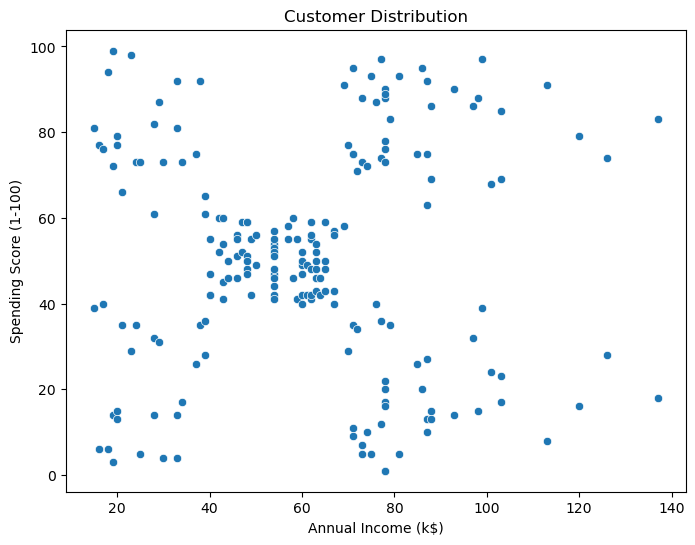

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Customer Distribution")
plt.show()

### Step 5: Scale features

In [19]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

### Step 6: Clusters using the Elbow Method

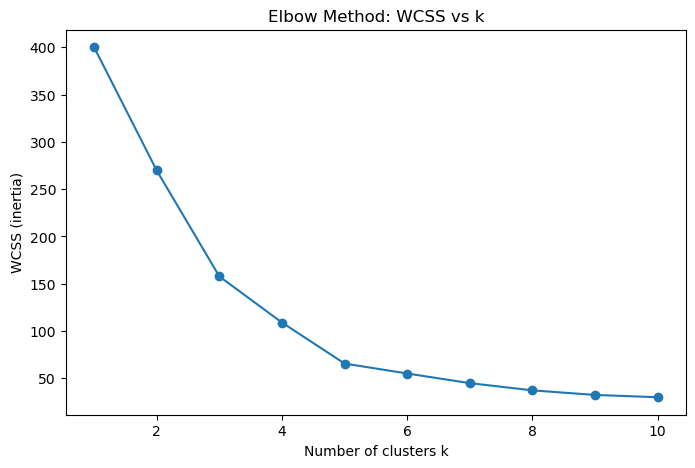

In [20]:
# Suppress the specific warning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

def plot_elbow(X_scaled, max_k=10):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title('Elbow Method: WCSS vs k')
    plt.xlabel('Number of clusters k')
    plt.ylabel('WCSS (inertia)')
    plt.show()

plot_elbow(X1_scaled)

In [21]:
# Choose Optimal Clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X1_scaled)

from sklearn.cluster import MiniBatchKMeans

# Using MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X1_scaled)

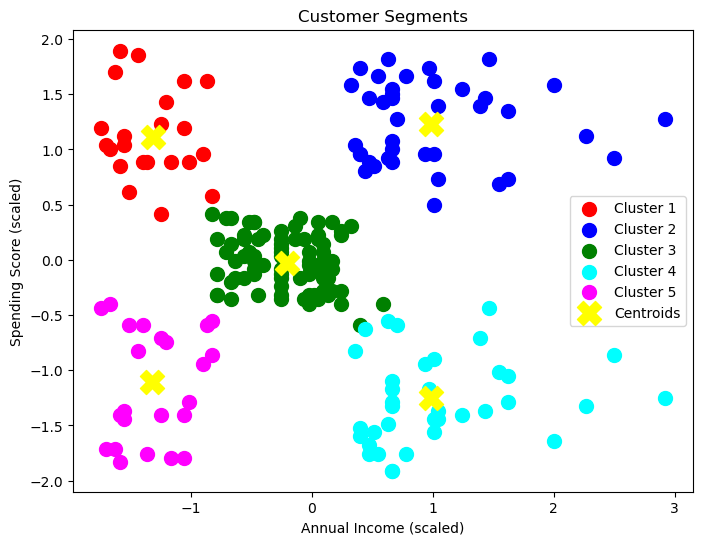

In [22]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X1_scaled[y_kmeans == i, 0], X1_scaled[y_kmeans == i,1],
                s=100, c=colors[i], label=f'Cluster {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

### Step 7: Fit KMeans with chosen k

In [23]:
k_opt = 5
kmeans1 = KMeans(n_clusters=k_opt, init='k-means++', random_state=42)
labels1 = kmeans1.fit_predict(X1_scaled)
df2['Cluster_Income_Spend'] = labels1

### Step 8: Evaluate Clusters

In [24]:
sil1 = silhouette_score(X1_scaled, labels1)
print(f'Silhouette score (Income-Spend): {sil1:.3f}')

Silhouette score (Income-Spend): 0.555


### Step 9: Visualize clusters

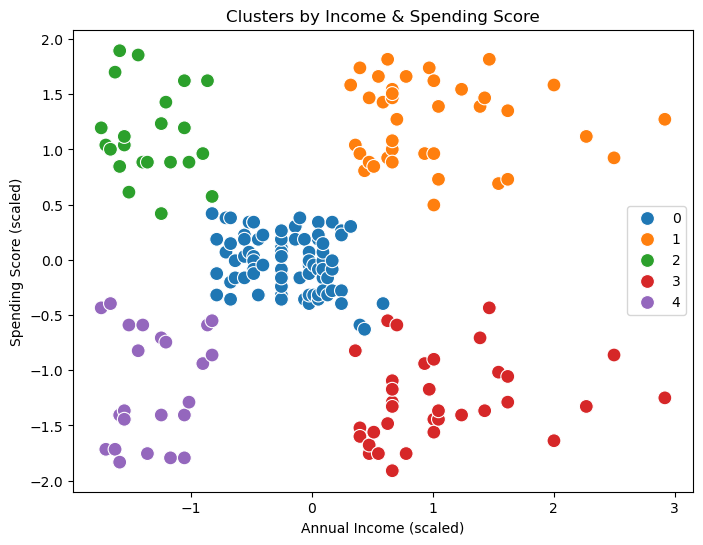

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X1_scaled[:,0], y=X1_scaled[:,1], hue=labels1, palette='tab10', s=100)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Clusters by Income & Spending Score')
plt.show()

   cluster  Spending Score (1-100)
0        0               79.363636
1        1               82.128205
2        2               49.712500
3        3               17.583333
4        4               20.913043


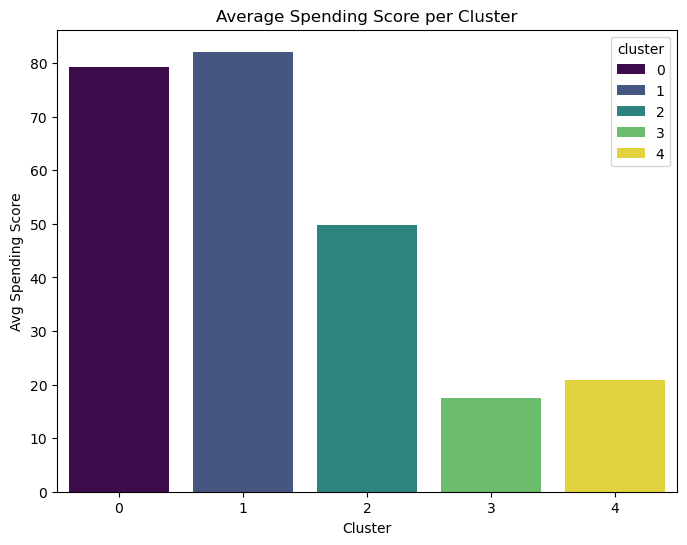

In [26]:
 # Bonus task 2
# Add cluster labels to original DataFrame
df['cluster'] = y_kmeans

# Calculate average spending score per cluster
avg_spending = df.groupby('cluster')['Spending Score (1-100)'].mean().reset_index()
print(avg_spending)

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x="cluster", y="Spending Score (1-100)", data=avg_spending, palette='viridis', hue="cluster")
plt.title("Average Spending Score per Cluster")
plt.ylabel("Avg Spending Score")
plt.xlabel("Cluster")
plt.show()

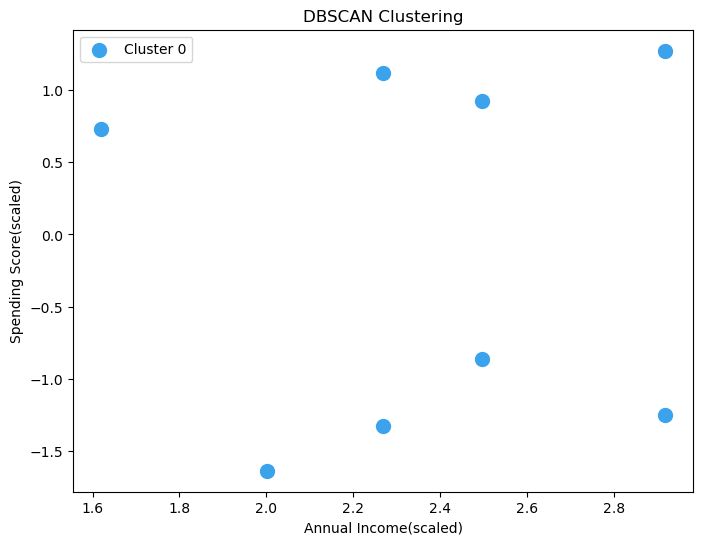

Silhouette Score:  0.35044619989666004


In [27]:
#Bonus challenge
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X1_scaled)

#Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
unique_labels = set (db_labels)
colors = sns.color_palette("husl", len(unique_labels))



for label in unique_labels:
    if label == 1:
        #Noise
        color = 'black'
        label_name = 'Noise'
else:
    color = colors[label]
    label_name = f'Cluster {label+1}'
plt.scatter(X1_scaled [db_labels == label, 0], X1_scaled[db_labels == label, 1],
            s=100, c=[color], label=label_name)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income(scaled)")
plt.ylabel("Spending Score(scaled)")
plt.legend()
plt.show()

# Evaluate Clustering
print("Silhouette Score: ", silhouette_score(X1_scaled, db_labels))